# Project: Wrangling a Dataset (WeRateDogs)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#data_gathering">Data Gathering</a></li>
<li><a href="#assessing">Assessing Data</a></li>
<li><a href="#Cleaning">Data Cleaning</a></li>
<li><a href="#eda">Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### About Dataset
>The dataset that I will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

### Question(s) for Analysis
>1. To know the top 10 most common Dog breeds.

>2. To know the top 10 dog breeds with highest likes.

>3. To know the top 10 dog breeds with highest retweets.


###### Importation of Packages

In [83]:
# Importing the required python packages
#!pip install tweepy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy
from tweepy import OAuthHandler
import json
import re
from timeit import default_timer as timer

In this section of the report, I will load in the data, check for quality and tidyness issues, fix the issues and clean the dataset for analysis.

<a id='data_gathering'></a>

### Data Gathering

In [84]:
# Reading the twitter archive into a dataframe using read_csv from pandas
twt_df=pd.read_csv('twitter-archive-enhanced.csv')

In [85]:
# Downloading image prediction dataset using the requests package and reading it into a dataframe using read_csv from pandas
#url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
#response=requests.get(url)
#with open("image-predictions.tsv", mode='wb') as file:
   # file.write(response.content)
img_pred_df=pd.read_csv("image-predictions.tsv", sep='\t')

In [86]:
# Reading the twitter json file into a dataframe using read_json from pandas
twt_json_df = pd.read_json('tweet-json.txt', lines=True)
# Drop unnecessary columns
twt_json_df.drop(twt_json_df.columns.difference(['id', 'retweet_count', 'favorite_count']), axis=1, inplace=True)

<a id='assessing'></a>

### Assessing Data

In [87]:
# To display the first five rows of the dataset
twt_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [88]:
twt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [89]:
img_pred_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [90]:
img_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [91]:
twt_json_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [92]:
twt_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [93]:
# Checking the different tweet source.
twt_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [94]:
#Checking for unique dog names. 
twt_df.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

##### Observation
> It was observrd that during the extraction of the dataset some dog name's are wrongly extracted. Words such as ( a, one, by, an, my etc.) were included. The next line of codes are used to check for the full contents from which these wrong names are extracted from, to see if there is a correct name in the content.

In [95]:
error_name=twt_df[twt_df.name=='not'].text
text_sample_size = error_name.size - 1
for i, entry in enumerate(error_name):
    print(entry)
    if i != text_sample_size:
        print('----------')

There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10  
https://t.co/dp5h9bCwU7
----------
What jokester sent in a pic without a dog in it? This is not @rock_rates. This is @dog_rates. Thank you ...10/10 https://t.co/nDPaYHrtNX


###### Observation
> It was observed that dog with **'not'** as name is invalid. Therefore, I decided to put a null value in the name.

In [96]:
error_name=twt_df[twt_df.name=='such'].text
text_sample_size = error_name.size - 1
for i, entry in enumerate(error_name):
    print(entry)
    if i != text_sample_size:
        print('----------')

I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba


###### Observation
> It was observed that dog with **'such'** as name is invalid. Therefore, I decided to put a null value in the name.

In [97]:
error_name=twt_df[twt_df.name=='a'].text
text_sample_size = error_name.size - 1
for i, entry in enumerate(error_name):
    print(entry)
    if i != text_sample_size:
        print('----------')

Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af 
(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
----------
Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq
----------
Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn
----------
This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW
----------
Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R
----------
This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2
----------
This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 wo

###### Observation
> It was observed that dogs with **'a'** as name are invalid. Therefore, I decided to put a null value in the name.

In [98]:
error_name=twt_df[twt_df.name=='one'].text
text_sample_size = error_name.size - 1
for i, entry in enumerate(error_name):
    print(entry)
    if i != text_sample_size:
        print('----------')

Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK
----------
This is one of the most inspirational stories I've ever come across. I have no words. 14/10 for both doggo and owner https://t.co/I5ld3eKD5k
----------
This is one of the most reckless puppers I've ever seen. How she got a license in the first place is beyond me. 6/10 https://t.co/z5bAdtn9kd
----------
This is one esteemed pupper. Just graduated college. 10/10 what a champ https://t.co/nyReCVRiyd


###### Observation
> It was observed that dogs with **'one'** as name are invalid. Therefore, I decided to put a null value in the name.

In [99]:
error_name=twt_df[twt_df.name=='by'].text
for i, entry in enumerate(error_name):
    print(entry)

This is by far the most coordinated series of pictures I was sent. Downright impressive in every way. 12/10 for all https://t.co/etzLo3sdZE


###### Observation
> It was observed that dog with **'by'** as names is invalid. Therefore, I decided to put a null value in the name.

In [100]:
error_name=twt_df[twt_df.name=='my'].text
text_sample_size = error_name.size - 1
for i, entry in enumerate(error_name):
    print(entry)
    if i != text_sample_size:
        print('----------')

This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB


###### Observation
> It was observed that dog with **'my'** as name is invalid. Therefore, I decided to input the correct name which is Zoey.

In [101]:
error_name=twt_df[twt_df.name=='O'].text
for i, entry in enumerate(error_name):
    print(entry)

This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC


###### Observation
> It was observed that dog with **'O'** as name is valid but incomplete. Therefore, I decided to input the complete name.

In [102]:
error_name=twt_df[twt_df.name=='life'].text
for i, entry in enumerate(error_name):
    print(entry)

This is life-changing. 12/10 https://t.co/SroTpI6psB


###### Observation
> It was observed that dog with **'life'** as names is invalid. Therefore, I decided to put a null value in the name.

In [103]:
error_name=twt_df[twt_df.name=='Al'].text
for i, entry in enumerate(error_name):
    print(entry)

Meet Al Cabone. He's a gangsta puppa. Rather h*ckin ruthless. Shows no mercy sometimes. 11/10 pet w extreme caution https://t.co/OUwWbEKOUV


###### Observation
> It was observed that dog with **'Al'** as name is valid but imcomplete. Therefore, I decided to input the complete name.

In [104]:
error_name=twt_df[twt_df.name=='all'].text
for i, entry in enumerate(error_name):
    print(entry)

This is all I want in my life. 12/10 for super sleepy pupper https://t.co/4RlLA5ObMh


###### Observation
> It was observed that dog with **'all'** as name is invalid. Therefore, I decided to put a null value in the name.

In [105]:
error_name=twt_df[twt_df.name=='an'].text
text_sample_size = error_name.size - 1
for i, entry in enumerate(error_name):
    print(entry)
    if i != text_sample_size:
        print('----------')

RT @dog_rates: This is an East African Chalupa Seal. We only rate dogs. Please only send in dogs. Thank you... 10/10 https://t.co/iHe6liLwWR
----------
This is an Iraqi Speed Kangaroo. It is not a dog. Please only send in dogs. I'm very angry with all of you ...9/10 https://t.co/5qpBTTpgUt
----------
This is an East African Chalupa Seal. We only rate dogs. Please only send in dogs. Thank you... 10/10 https://t.co/iHe6liLwWR
----------
This is an Irish Rigatoni terrier named Berta. Completely made of rope. No eyes. Quite large. Loves to dance. 10/10 https://t.co/EM5fDykrJg
----------
This is an extremely rare horned Parthenon. Not amused. Wears shoes. Overall very nice. 9/10 would pet aggressively https://t.co/QpRjllzWAL
----------
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
----------
This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2

###### Observation
> It was observed that dogs with **'an'** as name are invalid. Therefore, I decided to put a null value in the name.

In [106]:
error_name=twt_df[twt_df.name=='Dot'].text
for i, entry in enumerate(error_name):
    print(entry)

This is Dot. He found out you only pretended to throw the ball that one time. You don't fuck with Dot. 8/10 https://t.co/Ymg4fwKlZd


###### Observation
> It was observed that dog with **'Dot'** as name is valid. Therefore, I decided retain the name Dot.

In [107]:
error_name=twt_df[twt_df.name=='the'].text
text_sample_size = error_name.size - 1
for i, entry in enumerate(error_name):
    print(entry)
    if i != text_sample_size:
        print('----------')

Stop sending in lobsters. This is the final warning. We only rate dogs. Thank you... 9/10 https://t.co/B9ZXXKJYNx
----------
This is the newly formed pupper a capella group. They're just starting out but I see tons of potential. 8/10 for all https://t.co/wbAcvFoNtn
----------
This is the happiest pupper I've ever seen. 10/10 would trade lives with https://t.co/ep8ATEJwRb
----------
This is the saddest/sweetest/best picture I've been sent. 12/10 😢🐶 https://t.co/vQ2Lw1BLBF
----------
This is the best thing I've ever seen so spread it like wildfire &amp; maybe we'll find the genius who created it. 13/10 https://t.co/q6RsuOVYwU
----------
Never forget this vine. You will not stop watching for at least 15 minutes. This is the second coveted.. 13/10 https://t.co/roqIxCvEB3
----------
This is the happiest dog you will ever see. Very committed owner. Nice couch. 10/10 https://t.co/RhUEAloehK
----------
Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol 

###### Observation
> It was observed that dogs with **'the'** as name are invalid. Therefore, I decided to put a null value in the name.

In [108]:
error_name=twt_df[twt_df.name=='old'].text
text_sample_size = error_name.size - 1
for i, entry in enumerate(error_name):
    print(entry)
    if i != text_sample_size:
        print('----------')

This is old now but it's absolutely heckin fantastic and I can't not share it with you all. 13/10  https://t.co/wJX74TSgzP


###### Observation
> It was observed that dog with **'old'** as name is invalid. Therefore, I decided to put a null value in the name.

In [109]:
error_name=twt_df[twt_df.name=='actually'].text
text_sample_size = error_name.size - 1
for i, entry in enumerate(error_name):
    print(entry)
    if i != text_sample_size:
        print('----------')

This is actually a pupper and I'd pet it so well. 12/10
https://t.co/RNqS7C4Y4N
----------
This is actually a lion. We only rate dogs. For the last time please only send dogs. Thank u.
12/10 would still pet https://t.co/Pp26dMQxap


###### Observation
> It was observed that dogs with **'actually'** as name are invalid. Therefore, I decided to put a null value in the name.

In [110]:
error_name=twt_df[twt_df.name=='getting'].text
text_sample_size = error_name.size - 1
for i, entry in enumerate(error_name):
    print(entry)
    if i != text_sample_size:
        print('----------')

This is getting incredibly frustrating. This is a Mexican Golden Beaver. We only rate dogs. Only send dogs ...10/10 https://t.co/0yolOOyD3X
----------
Please stop sending in saber-toothed tigers. This is getting ridiculous. We only rate dogs.
...8/10 https://t.co/iAeQNueou8


###### Observation
> It was observed that dogs with **'getting'** as name are not dogs. Therefore, I decided delete them.

In [111]:
error_name=twt_df[twt_df.name=='quite'].text
text_sample_size = error_name.size - 1
for i, entry in enumerate(error_name):
    print(entry)
    if i != text_sample_size:
        print('----------')

RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…
----------
We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9
----------
Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x
----------
This is quite the dog. Gets really excited when not in water. Not very soft tho. Bad at fetch. Can't do tricks. 2/10 https://t.co/aMCTNWO94t


###### Observation
> It was observed that dogs with **'quite'** as name are invalid. Therefore, I decided to put a null value in the name.

In [112]:
error_name=twt_df[twt_df.name=='his'].text
text_sample_size = error_name.size - 1
for i, entry in enumerate(error_name):
    print(entry)
    if i != text_sample_size:
        print('----------')

That is Quizno. This is his beach. He does not tolerate human shenanigans on his beach. 10/10 reclaim ur land doggo https://t.co/vdr7DaRSa7


###### Observation
> It was observed that dog with **'his'** as name is Quizno. Therefore, I decided to put the real name.

In [113]:
error_name=twt_df[twt_df.name=='this'].text
text_sample_size = error_name.size - 1
for i, entry in enumerate(error_name):
    print(entry)
    if i != text_sample_size:
        print('----------')

Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv


###### Observation
> It was observed that dog with **'this'** as name is invalid. Therefore, I decided to put a null value in the name.

In [114]:
#Checking the unique denominator rating.
twt_df.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

###### Observation
> According to the research motivation, the denominator rating is not expected to be more than 10. Therefore, I will change all values to 10.

In [115]:
# Checking for entries not related to dog.
error_name=twt_df[twt_df.text.str.match('.* only .* dogs')].text
text_sample_size = error_name.size - 1
for i, entry in enumerate(error_name):
    print(entry)
    if i != text_sample_size:
        print('----------')

This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp
----------
Please only send dogs. We don't rate mechanics, no matter how h*ckin good. Thank you... 13/10 would sneak a pat https://t.co/Se5fZ9wp5E
----------
Ugh not again. We only rate dogs. Please don't send in well-dressed  floppy-tongued street penguins. Dogs only please. Thank you... 12/10 https://t.co/WiAMbTkDPf
----------
I can't believe this keeps happening. This, is a birb taking a bath. We only rate dogs. Please only send dogs. Thank you... 12/10 https://t.co/pwY9PQhtP2
----------
RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…
----------
Unbelievable. We only rate dogs. Please don't send in non-canines like the "I" from Pixar's opening credits. Thank you... 12/10 https://t.co/JMhDNv5wXZ
----------
Oh my this spooked me up. We only r

In [116]:
twt_df[twt_df.text.str.match('.* only .* dogs')].text.count()

74

###### Observation
> I observed that some entries are not related to dog and they have a pattern which is **"only rate dogs"**. Therefore, I decided to drop the rows.

### Quality Issues
>1. Tweet id has a wrong data type, its a string instead of integer.

>2. Timestamp has a wrong data type, it's a datetime instead of object.

>3. Extract tweet source and convert data type to category.

>4. Drop rows with entries not related to dogs.

>5. Rename O'Malley, Al Cabone, Quizno and Zoey in the name column. 

>6. Fix the errors (e.g. a, one, by, an, my etc.) in Dog name.

>7. Replace the denominator rating with 10.

>8. Drop rows with retweets.

>9. Drop rows without image.

>10. Drop unnecessary columns from the dataframes.

>11. Rename columns with appropriate names.

### Tideness Issues
>1. Merge dog stage into one column.

>2. Merge the three datasets into ona dataframe.

>3. Merge dog breed into one column.

<a id='Cleaning'></a>
## Data Cleaning

> After assessing the dataset, I will clean the data with respect to the errors detected.

In [117]:
# Creating a copy of the original datasets for reference
twt_clean_df = twt_df.copy()
img_pred_clean_df = img_pred_df.copy()
twt_json_clean_df = twt_json_df.copy() 

##### Quality Issue 1

##### Define:
> The datatype of tweet id is integer instead of string.

##### Code

In [118]:
# Changing the datatype of tweet_id from integer to strings
twt_clean_df.tweet_id=twt_clean_df.tweet_id.astype('str')
img_pred_clean_df.tweet_id=img_pred_clean_df.tweet_id.astype('str')
#Renaming the column from 'id' to 'tweet_id'
twt_json_clean_df.rename(columns={'id':'tweet_id'}, inplace=True)
#Changing the datatype to string
twt_json_clean_df.tweet_id=twt_json_clean_df.tweet_id.astype('str')

##### Test

In [119]:
twt_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

##### Tideness Issue 2

##### Define
To be able to merge the three dataset, we need to rename the id column of the image prediction dataset to tweet id and change the data type, so as to have a universal name

##### Code

In [120]:
# Merge the three DataFrames into one master DataFrame, starting first with archive_clean and json_clean
first_archive_master_df = pd.merge(twt_clean_df, twt_json_clean_df, on=['tweet_id','tweet_id'],how='left') 
# Merge new master with image_clean
merged_df = pd.merge(first_archive_master_df, img_pred_clean_df, on='tweet_id',how='left') 

##### Test

In [121]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

##### Quality Issue 2

##### Define:
> Timestamp needs to be stripped and converted to the correct datatype (datetime)

##### Code

In [122]:
###### Changing Timestamp datatype from object to datetime
# Strip +0000 from timestamp column
merged_df.timestamp = merged_df.timestamp.str.strip('+0000')
# Convert data type to datetime
merged_df.timestamp = pd.to_datetime(merged_df.timestamp)

##### Test

In [123]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   object        
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

##### Quality Issue 3

##### Define:
> The tweet source is a url, so I will extract the last part of the url which specifies the exact tweet source. After which i will change the datatype to category.

##### Code

In [124]:
# Use re library with findall function and extract real source from tags > ...... <
merged_df['source'] = merged_df['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])
merged_df['source'] = merged_df['source'].astype('category')

##### Test

In [125]:
# Check extracted correct information
merged_df['source'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

In [126]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   object        
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   category      
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

##### Quality Issue 4

##### Define
> To remove entries that are not dogs, i noticed there is a pattern among the wrong entries.

##### Code

In [127]:
merged_df = merged_df[twt_clean_df["text"].str.contains('.* only .* dogs') == False]

##### Test

In [128]:
merged_df[merged_df.text.str.match('.* only .* dogs')].text.count()

0

In [129]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2282 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2282 non-null   object        
 1   in_reply_to_status_id       77 non-null     float64       
 2   in_reply_to_user_id         77 non-null     float64       
 3   timestamp                   2282 non-null   datetime64[ns]
 4   source                      2282 non-null   category      
 5   text                        2282 non-null   object        
 6   retweeted_status_id         172 non-null    float64       
 7   retweeted_status_user_id    172 non-null    float64       
 8   retweeted_status_timestamp  172 non-null    object        
 9   expanded_urls               2223 non-null   object        
 10  rating_numerator            2282 non-null   int64         
 11  rating_denominator          2282 non-null   int64       

##### Quality Issue 5

##### Define 
> To input the correct names of dogs.

##### Code

In [130]:
merged_df.name.replace(['O', 'Al', 'his', 'my'], ['O\'Malley' ,'Al Cabone', 'Quizno', 'Zoey'], inplace=True)

##### Test

In [131]:
merged_df.name[merged_df.name=='O\'Malley']

775    O'Malley
Name: name, dtype: object

##### Quality Issue 6

##### Define
> To input null for dogs with wrong name (i.e name not mentioned in tweet text)

##### Code

In [132]:
# I noticed all incorrect names have their first letter has lowercase. We will use this to change them into null values. 
# for loop iterates through name column checking if the first letter is lowercase.
for name in merged_df['name']:
    if name[0].islower() == True:
         merged_df.name = merged_df.name.replace({name:'None'})

In [133]:
merged_df.name.replace('None',np.nan, inplace=True)

##### Test

In [134]:
#To test if the lower case 
list(merged_df['name'].unique())

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 nan,
 'Jax',
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Canela',
 'Gerald',
 'Jeffrey',
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'Waffles',
 'Jimbo',
 'Maisey',
 'Lilly',
 'Earl',
 'Lola',
 'Kevin',
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 'Elliot',
 'Louis',
 'Jesse',
 'Romeo',
 'Bailey',
 'Duddles',
 'Jack',
 'Emmy',
 'Steven',
 'Beau',
 'Snoopy',
 'Shadow',
 'Terrance',
 'Aja',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 'Cash',
 'Coco',
 'Jed',
 'Sebastian',
 'Walter',
 'Sierra',
 'Monkey',
 'Harry',
 'Kody',
 'Lassie',
 'Rover',
 'Napolean',
 'Dawn',
 'Boomer',
 'Cody',
 'Rumble',
 'Clifford',
 'Dewey',
 'Scout',
 'Gizmo',
 'Cooper',
 'Harold',
 'Shikha',
 'Jamesy',
 'Lili',
 'Sammy',
 'Meatball',
 'Paisley',
 'Albus',
 'Neptune',
 'Quinn',
 'Belle',
 'Zooey',


##### Quality Issue 7

##### Define
> To change the rating_denominator to 10, so as to have a uniform denominator.

##### Code

In [135]:
merged_df.rating_denominator=merged_df.rating_denominator=10

##### Test

In [136]:
merged_df.rating_denominator.value_counts()

10    2282
Name: rating_denominator, dtype: int64

##### Quality Issue 8

##### Define
> To remove the retweets.

##### Code

In [137]:
# the "retweet_status_id" includes the original tweet_id if there is a retweet. There are 172 retweets.
# We keep the rows that are null and remove the retweets.
merged_df = merged_df[merged_df.retweeted_status_id.isnull()]

##### Test

In [138]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2110 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2110 non-null   object        
 1   in_reply_to_status_id       77 non-null     float64       
 2   in_reply_to_user_id         77 non-null     float64       
 3   timestamp                   2110 non-null   datetime64[ns]
 4   source                      2110 non-null   category      
 5   text                        2110 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               2052 non-null   object        
 10  rating_numerator            2110 non-null   int64         
 11  rating_denominator          2110 non-null   int64       

##### Quality Issue 9

##### Define
> To remove entries with no image url.

##### Code

In [139]:
# After deleting the retweets and replies we still have 126 tweets without an image, as this was one of the project's
# requirements we will delete the tweets without an image. This time we will keep the rows with an image.
merged_df = merged_df[merged_df.jpg_url.notnull()]

##### Test

In [140]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1930 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    1930 non-null   object        
 1   in_reply_to_status_id       22 non-null     float64       
 2   in_reply_to_user_id         22 non-null     float64       
 3   timestamp                   1930 non-null   datetime64[ns]
 4   source                      1930 non-null   category      
 5   text                        1930 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               1930 non-null   object        
 10  rating_numerator            1930 non-null   int64         
 11  rating_denominator          1930 non-null   int64       

In [141]:
merged_df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1800,676975532580409345,NaN,NaN,2015-12-16 04:01:59,Twitter for iPhone,This is Cooper. He doesn't know how cheese wor...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676975532...,11,10,Cooper,None,None,None,None,1203.0,3015.0,https://pbs.twimg.com/media/CWUZpydWcAAeipD.jpg,1.0,malamute,0.363257,True,Siberian_husky,0.245862,True,Eskimo_dog,0.125547,True
1597,686050296934563840,NaN,NaN,2016-01-10 05:01:51,Twitter for iPhone,This is Flávio. He's a Macedonian Poppycock. 9...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686050296...,11,10,Flávio,None,None,None,None,836.0,2420.0,https://pbs.twimg.com/media/CYVXBb9WsAAwL3p.jpg,1.0,Pomeranian,0.985789,True,keeshond,0.004083,True,Pekinese,0.003334,True
2271,667495797102141441,NaN,NaN,2015-11-20 00:12:54,Twitter Web Client,This is Philippe from Soviet Russia. Commandin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667495797...,9,10,Philippe,None,None,None,None,294.0,565.0,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,1.0,Chihuahua,0.143957,True,Christmas_stocking,0.118651,False,ski_mask,0.092482,False
585,800018252395122689,NaN,NaN,2016-11-19 16:49:49,Twitter for iPhone,Here's a doggo doin a struggle. 11/10 much det...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/800018252...,11,10,NaN,doggo,None,None,None,15351.0,31768.0,https://pbs.twimg.com/ext_tw_video_thumb/80001...,1.0,vacuum,0.289485,False,punching_bag,0.243297,False,barbell,0.143630,False
1756,678767140346941444,NaN,NaN,2015-12-21 02:41:11,Twitter for iPhone,This is Mia. She makes awful decisions. 8/10 h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678767140...,8,10,Mia,None,None,None,None,1553.0,3864.0,https://pbs.twimg.com/media/CWt3G6EVEAIGEPr.jpg,1.0,harp,0.821120,False,window_screen,0.025121,False,mosquito_net,0.016716,False
844,766693177336135680,NaN,NaN,2016-08-19 17:47:52,Twitter for iPhone,This is Brudge. He's a Doberdog. Going to be h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/766693177...,11,10,Brudge,None,None,None,None,918.0,4484.0,https://pbs.twimg.com/media/CqPXYLLXEAAU2HC.jpg,1.0,Doberman,0.948355,True,vizsla,0.015032,True,Rhodesian_ridgeback,0.009631,True
693,786963064373534720,NaN,NaN,2016-10-14 16:13:10,Twitter for iPhone,This is Rory. He's got an interview in a few m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/786963064...,12,10,Rory,None,None,None,None,9327.0,29725.0,https://pbs.twimg.com/media/Cuvau3MW8AAxaRv.jpg,1.0,golden_retriever,0.915303,True,Saluki,0.046213,True,Labrador_retriever,0.037504,True
376,828046555563323392,NaN,NaN,2017-02-05 01:04:17,Twitter for iPhone,This is Sailer. He waits on the roof for his o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/828046555...,13,10,Sailer,None,None,None,None,3260.0,12923.0,https://pbs.twimg.com/media/C33P8PrUcAMiQQs.jpg,3.0,patio,0.272972,False,window_screen,0.131295,False,boathouse,0.046393,False
1985,672898206762672129,NaN,NaN,2015-12-04 22:00:08,Twitter for iPhone,This is Cheryl AKA Queen Pupper of the Skies. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672898206...,11,10,Cheryl,None,None,pupper,None,459.0,944.0,https://pbs.twimg.com/media/CVadWcCXIAAL4Sh.jpg,1.0,motor_scooter,0.835819,False,bobsled,0.035856,False,moped,0.033079,False
223,849412302885593088,NaN,NaN,2017-04-05 00:04:08,Twitter for iPhone,This is Noosh. He noticed you were in the show...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/849412302...,12,10,Noosh,None,None,None,None,3487.0,17039.0,https://pbs.twimg.com/media/C8m3-iQVoAAETnF.jpg,4.0,schipperke,0.907559,True,crossword_puzzle,0.017934,False,Chihuahua,0.016191,True


##### Tideness Issue 1

##### Define
> To merge dog stages, so that we can have a single column.

##### Code

In [142]:
# Melt the 4 columns into a column'types' to be deleted and a value'dog_type'column to keep.
merged_df['dog_stage'] = merged_df["doggo"] + merged_df["floofer"] +  merged_df["pupper"]+ merged_df["puppo"]

In [143]:
merged_df.dog_stage.value_counts()

NoneNoneNoneNone       1625
NoneNonepupperNone      203
doggoNoneNoneNone        63
NoneNoneNonepuppo        22
doggoNonepupperNone       9
NoneflooferNoneNone       7
doggoNoneNonepuppo        1
Name: dog_stage, dtype: int64

In [144]:
# We write a function to rename each entry appropriately
def func(i):
    if i == "NoneNoneNoneNone":
        return "None"
    elif i == "NoneNonepupperNone":
        return "pupper"
    elif i == "doggoNoneNoneNone":
        return "doggo"
    elif i == "NoneNoneNonepuppo":
        return "puppo"
    elif i == "doggoNonepupperNone":
        return "doggo/pupper"
    elif i == "NoneflooferNoneNone":
        return "floofer"
    elif i == "doggoNoneNonepuppo":
        return "doggo/puppo"
merged_df["dog_stage"] = merged_df["dog_stage"].apply(lambda x : func(x))

##### Test

In [145]:
merged_df.dog_stage.value_counts()

None            1625
pupper           203
doggo             63
puppo             22
doggo/pupper       9
floofer            7
doggo/puppo        1
Name: dog_stage, dtype: int64

##### Tideness Issue 3

##### Define
> To determine dog breed and the probability of prediction being true.

##### Code

In [146]:
# create 2 empty lists to save our choice for each row in the dataset
breed = []
confidence = []

# function that iterates through prediction columns to find the best prediction which is a breed of dog.
def breed_confidence(row):
    if row['p1_dog'] == True:
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append(np.nan)
        confidence.append(0)
        
# call function using pandas apply by columns
merged_df.apply(breed_confidence, axis=1)

# add lists created to master dataframe
merged_df['breed'] = breed
merged_df['confidence'] = confidence

##### Test

In [147]:
pd.set_option("display.max_columns", None)

In [148]:
merged_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,breed,confidence
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,8853.0,39467.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None,NaN,0.000000
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,6514.0,33819.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,None,Chihuahua,0.323581
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,4328.0,25461.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,None,Chihuahua,0.716012
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,8964.0,42908.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,None,Labrador_retriever,0.168086
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,9774.0,41048.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,None,basset,0.555712


##### Quality Issue 10

##### Define: 
> Dropping unnecessary columns

##### Code

In [149]:
# Drop predictions and prediction probability columns and the different dog stage columns
merged_df = merged_df.drop(['doggo','floofer','pupper','puppo','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog', 'in_reply_to_status_id', 'in_reply_to_user_id', 
                            'retweeted_status_timestamp', 'retweeted_status_user_id','retweeted_status_id', 'expanded_urls', 'img_num'],axis=1)

##### Test

In [150]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1930 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1930 non-null   object        
 1   timestamp           1930 non-null   datetime64[ns]
 2   source              1930 non-null   category      
 3   text                1930 non-null   object        
 4   rating_numerator    1930 non-null   int64         
 5   rating_denominator  1930 non-null   int64         
 6   name                1351 non-null   object        
 7   retweet_count       1930 non-null   float64       
 8   favorite_count      1930 non-null   float64       
 9   jpg_url             1930 non-null   object        
 10  dog_stage           1930 non-null   object        
 11  breed               1629 non-null   object        
 12  confidence          1930 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(3), i

In [151]:
merged_df.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,dog_stage,breed,confidence
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,8853.0,39467.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,None,NaN,0.000000
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,6514.0,33819.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,None,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,4328.0,25461.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,None,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,8964.0,42908.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,None,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,9774.0,41048.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,None,basset,0.555712


##### Quality Issue 11

##### Define
> Rename columns with appropriate names

##### Code

In [152]:
# Rename columns to make easier to understand for someone not familiar with the original data sets
merged_df = merged_df.rename(columns = {'timestamp':'tweet_date',
                           'source': 'tweet_source',
                           'text': 'tweet_text',
                           'retweet_count': 'no_of_retweets',
                           'rating_numerator': 'dog_rating',
                           'rating_denominator':'possible_rating',
                           'name': 'dog_name',
                           'favorite_count':'no_of_likes',
                           'jpg_url': 'image_link',
                           'breed': 'dog_breed',
                           'confidence': 'probability_AI_calc'})

##### Test

In [153]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1930 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   tweet_id             1930 non-null   object        
 1   tweet_date           1930 non-null   datetime64[ns]
 2   tweet_source         1930 non-null   category      
 3   tweet_text           1930 non-null   object        
 4   dog_rating           1930 non-null   int64         
 5   possible_rating      1930 non-null   int64         
 6   dog_name             1351 non-null   object        
 7   no_of_retweets       1930 non-null   float64       
 8   no_of_likes          1930 non-null   float64       
 9   image_link           1930 non-null   object        
 10  dog_stage            1930 non-null   object        
 11  dog_breed            1629 non-null   object        
 12  probability_AI_calc  1930 non-null   float64       
dtypes: category(1), datetime64[ns](1)

### Storing Dataset

After assessing, cleaning and merging of all dateset, I will save it to a csv file

In [154]:
#Saving the cleaned dataset to a csv file
merged_df.to_csv('twitter_archive_master.csv', index = False)

##### Loading Dataset for analysis

In [155]:
# Loading dataset for analysis
df = pd.read_csv('twitter_archive_master.csv')

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1930 entries, 0 to 1929
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tweet_id             1930 non-null   int64  
 1   tweet_date           1930 non-null   object 
 2   tweet_source         1930 non-null   object 
 3   tweet_text           1930 non-null   object 
 4   dog_rating           1930 non-null   int64  
 5   possible_rating      1930 non-null   int64  
 6   dog_name             1351 non-null   object 
 7   no_of_retweets       1930 non-null   float64
 8   no_of_likes          1930 non-null   float64
 9   image_link           1930 non-null   object 
 10  dog_stage            1930 non-null   object 
 11  dog_breed            1629 non-null   object 
 12  probability_AI_calc  1930 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 196.1+ KB


In [157]:
# Changing datatype
df.tweet_id=df.tweet_id.astype('str')
df.no_of_retweets=df.no_of_retweets.astype('int')
df.no_of_likes=df.no_of_likes.astype('int')

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1930 entries, 0 to 1929
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tweet_id             1930 non-null   object 
 1   tweet_date           1930 non-null   object 
 2   tweet_source         1930 non-null   object 
 3   tweet_text           1930 non-null   object 
 4   dog_rating           1930 non-null   int64  
 5   possible_rating      1930 non-null   int64  
 6   dog_name             1351 non-null   object 
 7   no_of_retweets       1930 non-null   int32  
 8   no_of_likes          1930 non-null   int32  
 9   image_link           1930 non-null   object 
 10  dog_stage            1930 non-null   object 
 11  dog_breed            1629 non-null   object 
 12  probability_AI_calc  1930 non-null   float64
dtypes: float64(1), int32(2), int64(2), object(8)
memory usage: 181.1+ KB


## Data Analysis

#### Summary Statistics

In [159]:
df.describe()

,dog_rating,possible_rating,no_of_retweets,no_of_likes,probability_AI_calc
count,1930.000000,1930.0,1930.000000,1930.000000,1930.000000
mean,12.339378,10.0,2705.691710,8677.446632,0.463259
std,42.178118,0.0,4642.819181,12047.825074,0.340148
min,0.000000,10.0,16.000000,81.000000,0.000000
25%,10.000000,10.0,612.250000,1876.500000,0.138796
50%,11.000000,10.0,1323.500000,3997.500000,0.455205
75%,12.000000,10.0,3129.750000,11098.000000,0.776559
max,1776.000000,10.0,79515.000000,132810.000000,0.999956


### Research Question 1: Top Ten Most common Breeds of Dog

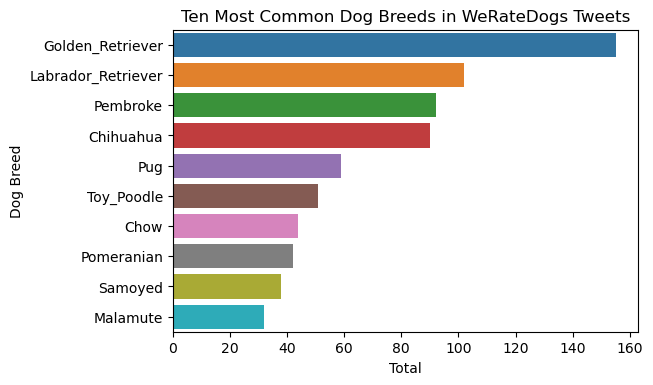

In [160]:
# Plot counts of the 10 most common dog breeds
top_breeds = (df.dog_breed.value_counts()
              .head(10)
              .to_frame()
              .reset_index()
              .rename(columns={'index': 'dog_breed', 'dog_breed': 'total'}))
top_breeds['dog_breed'] = top_breeds['dog_breed'].str.title()
plt.figure(dpi=100);
ax = sns.barplot(x='total', y='dog_breed', data=top_breeds);
ax.set_title('Ten Most Common Dog Breeds in WeRateDogs Tweets');
ax.set_ylabel('Dog Breed');
ax.set_xlabel('Total');

### Research Question 2: Top 10 dog breeds with highest likes.

In [161]:
# Total number of likes grouped by breed
df.groupby('dog_breed')['no_of_likes'].sum().nlargest(10)

dog_breed
golden_retriever      1880654
Labrador_retriever    1166598
Pembroke              1005629
Chihuahua              714214
French_bulldog         552600
Samoyed                462315
cocker_spaniel         391085
pug                    375134
chow                   344244
toy_poodle             339068
Name: no_of_likes, dtype: int32

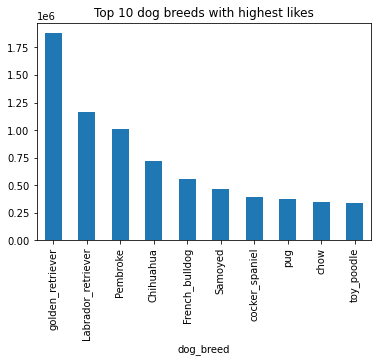

In [162]:
# Total number of likes grouped by breed
df.groupby('dog_breed')['no_of_likes'].sum().nlargest(10).plot(kind='bar', title='Top 10 dog breeds with highest likes');

### Research Question 3: Top 10 dog breeds with highest retweets.

In [163]:
# Total number of likes grouped by breed
df.groupby('dog_breed')['no_of_retweets'].sum().nlargest(10)

dog_breed
golden_retriever      573414
Labrador_retriever    364842
Pembroke              284125
Chihuahua             243403
Samoyed               169366
French_bulldog        152322
cocker_spaniel        142320
pug                   116039
toy_poodle            115768
Pomeranian            112171
Name: no_of_retweets, dtype: int32

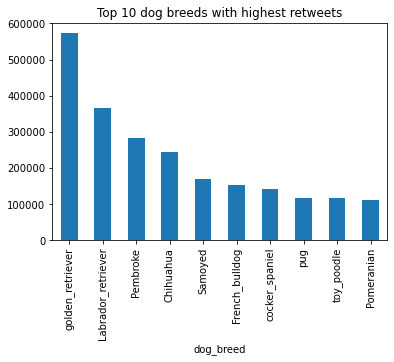

In [164]:
# Total number of likes grouped by breed
df.groupby('dog_breed')['no_of_retweets'].sum().nlargest(10).plot(kind='bar', title='Top 10 dog breeds with highest retweets');

<a id='conclusions'></a>

### Conclusions

It was observed that Golden Retriever has the highest number of likes and retweets.While, Labrador Retriever comes in second highest.

### Recommendation

The datasets have a lot of errors like dog name and structuring, which during the process of cleaning, I had to drop them. 
To derive more accurate information from these datasets, I recommend that the dataset should be properly structured with less errors.